# Telecom Churn Case Study

## Multivariate Logistic Regression

### Problem Statement: 

You have a telecom firm which has collected data of all its customers. 

The main types of attributes are:

1. Demographics (age, gender etc.)
2. Services availed (internet packs purchased, special offers taken etc.)
3. Expenses (amount of recharge done per month etc.)
 

Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not.<br> 
So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not.

### Data

Data is available is three csv files and a data dictionary is provided to define/explain all the variables.

In [349]:
# Supress Warnings

import warnings

from numpy.conftest import dtype

warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

## Reading and Understanding the Data and Merging Data

In [350]:
# Importing all datasets
# data is available in 3 different data set, we need to read each and merge them to make 1 data set
# 1st is this churn_data set which has information of the customer id with their payments and usages with the churn status
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [351]:
# 2nd is the customer data which has information on the customer specific details like gender, dependency, age
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [352]:
# 3rd data set is about the internet services related details like 	customerID	MultipleLines	InternetService	OnlineSecurity
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [353]:
# Merging on 'customerID'
# Lets check the master data set
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [354]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Data Inspection

In [355]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [356]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [357]:
# let's look at the statistical aspects of the dataframe
# pandas's describe cal explains the data distribution using quantiles
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [358]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Data Cleaning

In [359]:
# Checking Null values
telecom.isnull().sum()*100/telecom.shape[0]
# There are no NULL values in the dataset, hence it is clean.
# if there would be nulls, we can impute the data either with mean or median, but median is more sensible

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

#### Total Charges

In [360]:
telecom['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [361]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [362]:
# Total Charges will be related to Monthly Charges.
# We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges

In [363]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()*telecom['MonthlyCharges']

In [364]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])

In [365]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

## EXploratory Data Analytics

### Univariate Analysis

#### Churn (Target Variable)

In [366]:
telecom.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

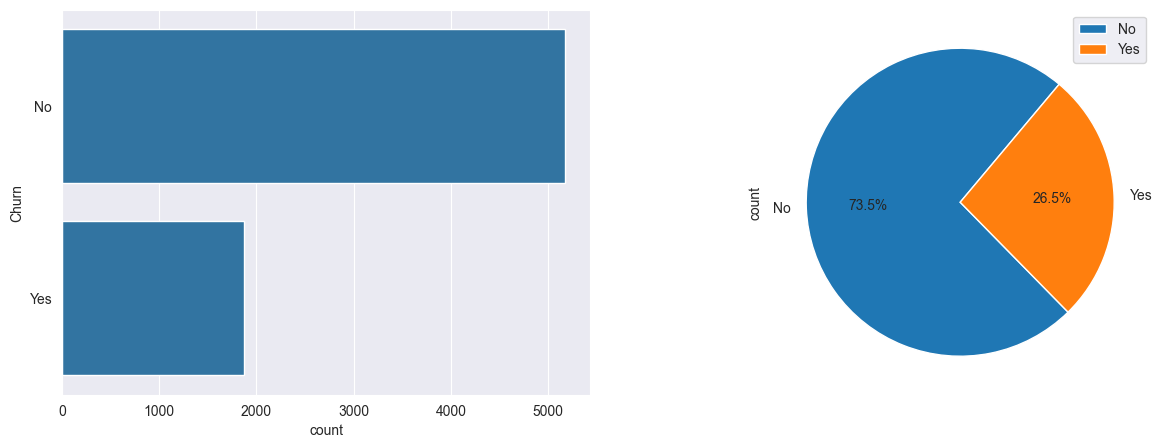

In [367]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(telecom['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(telecom['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()

In [368]:
# We have a data with 27% churn rate.

#### Tenure

In [369]:
# The time for which a customer has been using the service.

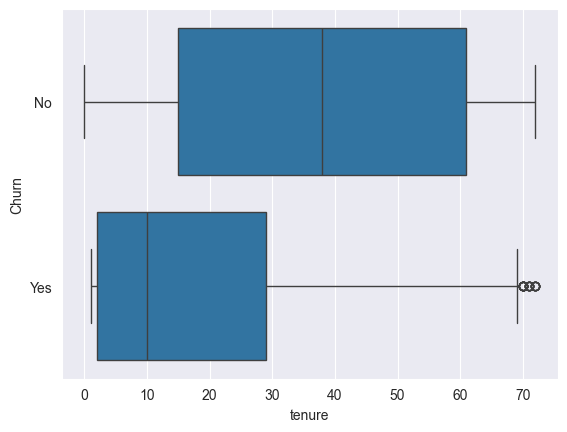

In [370]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

In [371]:
# Customer with more tenure tends to churn less.

#### Phone Service

In [372]:
# Whether a customer has a landline phone service along with the internet service.

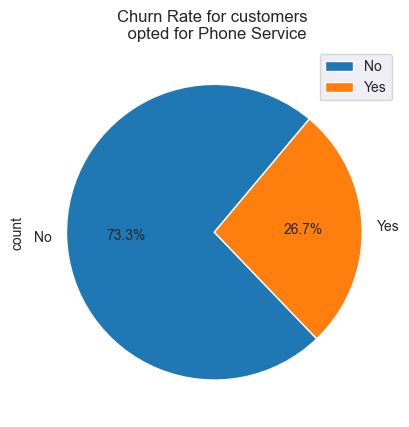

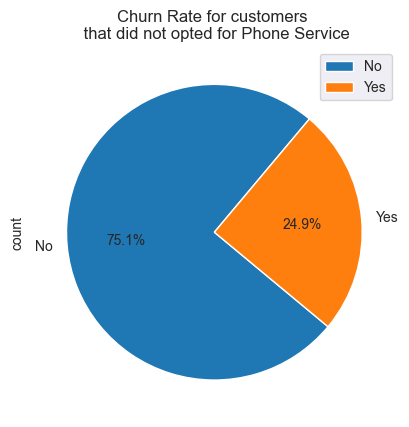

In [373]:
pie_PhoneService_Yes = pd.DataFrame(telecom[telecom['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(telecom[telecom['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 

In [374]:
# Opting for phone service does not have a significant impact on churn rate.

#### Contract

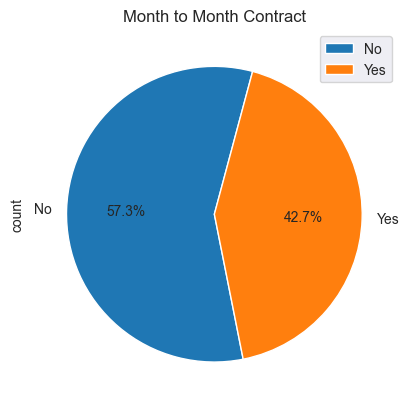

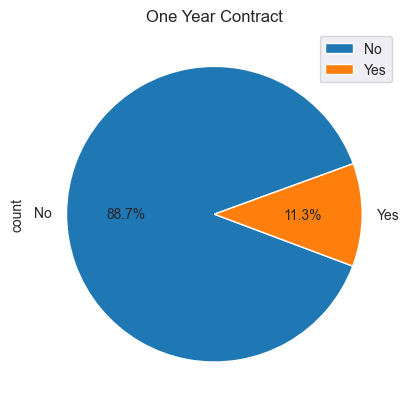

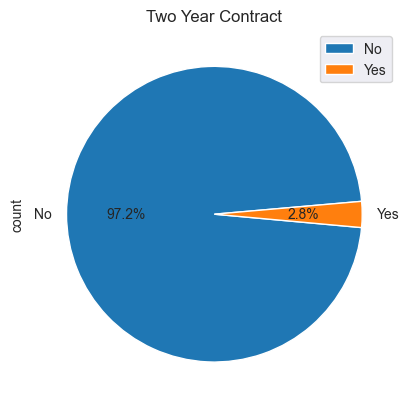

In [375]:
pie_Contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom[telecom['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom[telecom['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

In [376]:
# Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

#### Paperless Billing

<Figure size 1500x500 with 0 Axes>

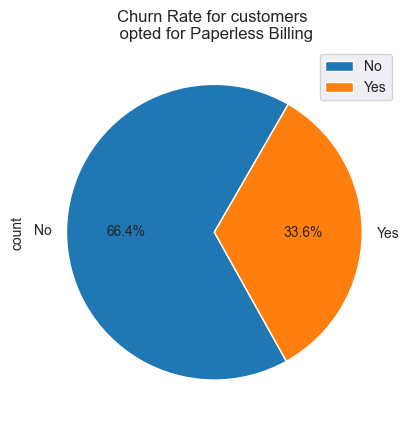

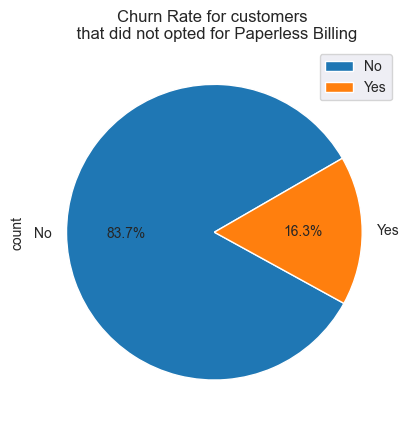

In [377]:
plt.figure(figsize=(15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

In [378]:
# Churn Rate is higher for the customers who opted for paperless billing.

#### Payment Method

In [379]:
telecom.PaymentMethod.describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

<Figure size 1500x1000 with 0 Axes>

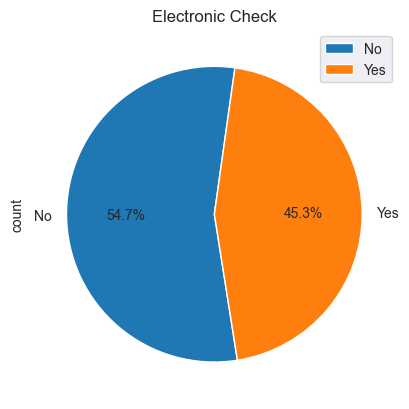

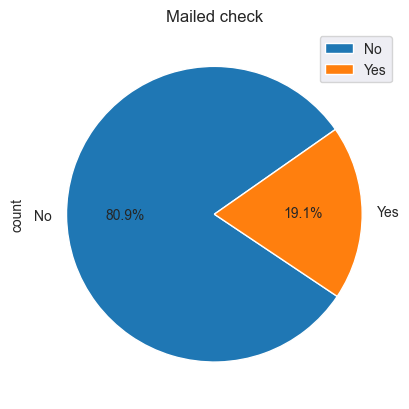

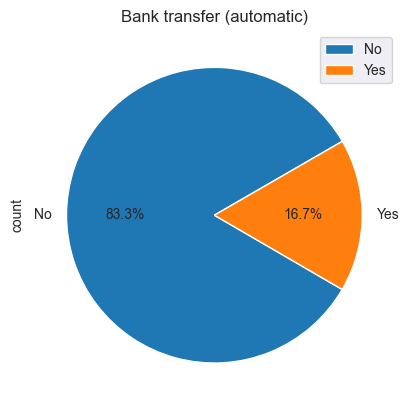

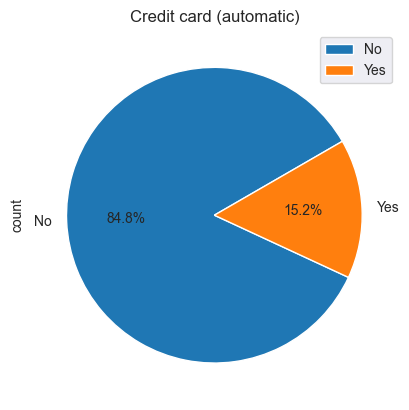

In [380]:
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

In [381]:
# Customers with Electronic Check tends to churn more than other payment methods.

#### Monthly Charges

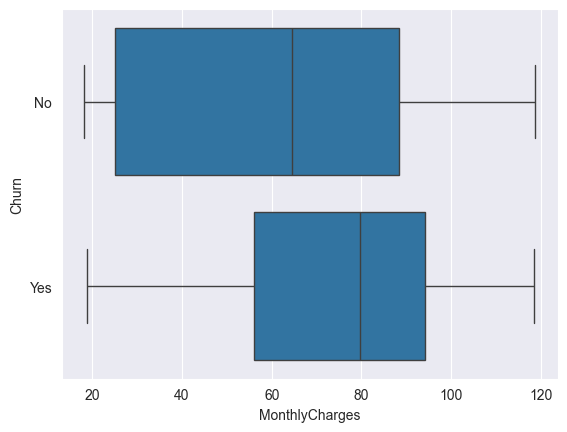

In [382]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

In [383]:
# Median monthly charges are higher for customers who have churned.

#### TotalCharges

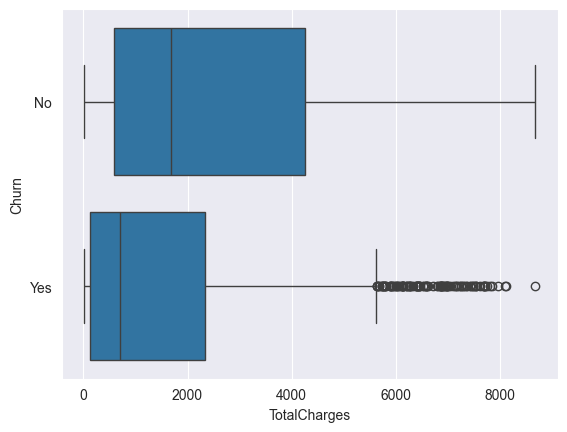

In [384]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

In [385]:
# Median Total charges are low for customers who have churned.

#### Gender

<Figure size 1500x500 with 0 Axes>

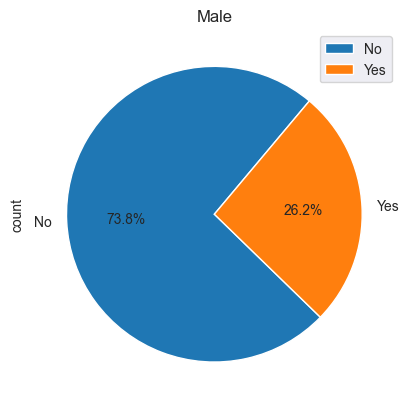

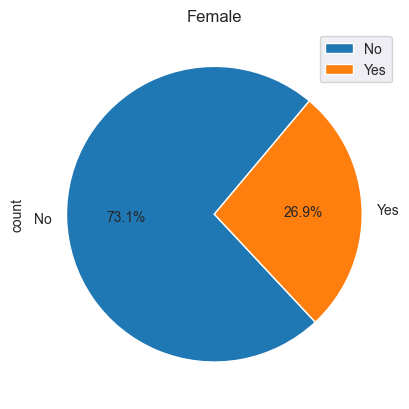

In [386]:
plt.figure(figsize=(15,5))
pie_Gender_M = pd.DataFrame(telecom[telecom['gender'] == "Male"]['Churn'].value_counts())
pie_Gender_M.plot.pie(subplots = True, labels = pie_Gender_M.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Male')
plt.gca().set_aspect('equal')

pie_Gender_F = pd.DataFrame(telecom[telecom['gender'] == "Female"]['Churn'].value_counts())
pie_Gender_F.plot.pie(subplots = True,  labels = pie_Gender_F.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show() 

In [387]:
# There is no effect of Gender on Churn.

#### Senior Citizen

<Figure size 1500x500 with 0 Axes>

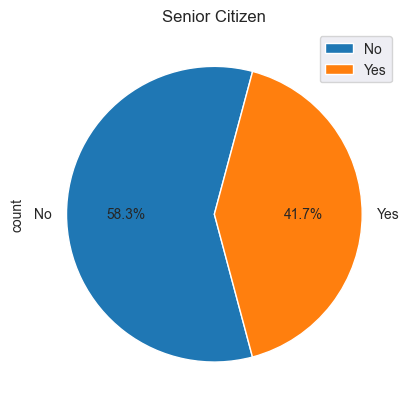

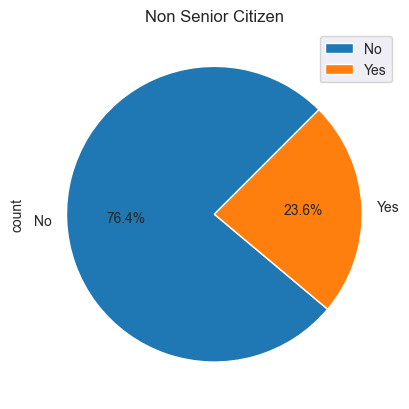

In [388]:
plt.figure(figsize=(15,5))
pie_SeniorCitizen_Y = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 1]['Churn'].value_counts())
pie_SeniorCitizen_Y.plot.pie(subplots = True, labels = pie_SeniorCitizen_Y.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen')
plt.gca().set_aspect('equal')

pie_SeniorCitizen_N = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 0]['Churn'].value_counts())
pie_SeniorCitizen_N.plot.pie(subplots = True, labels = pie_SeniorCitizen_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Non Senior Citizen')

plt.gca().set_aspect('equal')
plt.show() 

In [389]:
# Senior Citizens tends to churn more.

#### Partner

<Figure size 1500x500 with 0 Axes>

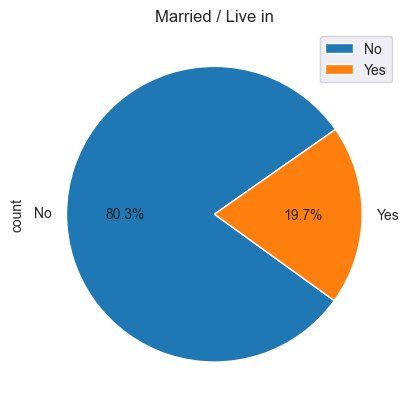

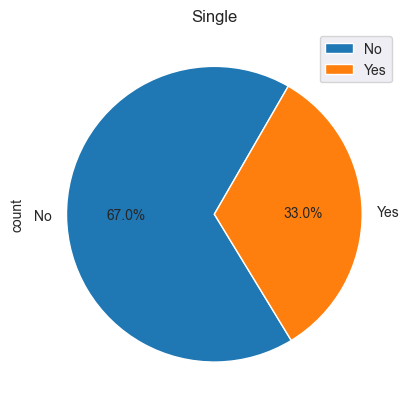

In [390]:
plt.figure(figsize=(15,5))
pie_Partner_Y = pd.DataFrame(telecom[telecom['Partner'] == 'Yes']['Churn'].value_counts())
pie_Partner_Y.plot.pie(subplots = True,  labels = pie_Partner_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Married / Live in')
plt.gca().set_aspect('equal')

pie_Partner_N = pd.DataFrame(telecom[telecom['Partner'] == 'No']['Churn'].value_counts())
pie_Partner_N.plot.pie(subplots = True,  labels = pie_Partner_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Single')

plt.gca().set_aspect('equal')
plt.show() 

#### Dependents

<Figure size 1500x500 with 0 Axes>

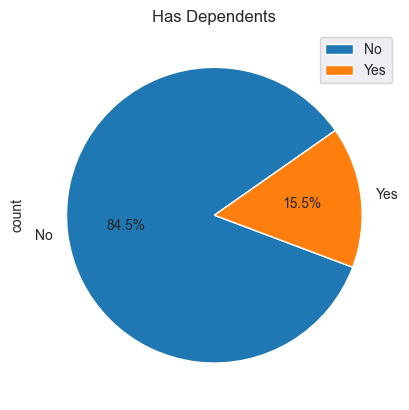

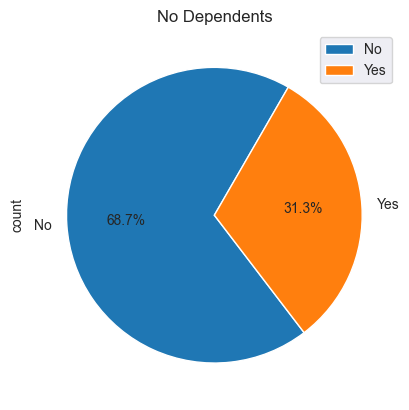

In [391]:
plt.figure(figsize=(15,5))
pie_Dependents_Y = pd.DataFrame(telecom[telecom['Dependents'] == 'Yes']['Churn'].value_counts())
pie_Dependents_Y.plot.pie(subplots = True,  labels = pie_Dependents_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

pie_Dependents_N = pd.DataFrame(telecom[telecom['Dependents'] == 'No']['Churn'].value_counts())
pie_Dependents_N.plot.pie(subplots = True,  labels = pie_Dependents_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show() 

In [392]:
# Customers with no dependents tends to churn more.

#### Multiple Lines

In [393]:
# Whether a customer has multiple lines of internet connectivity.

<Figure size 1500x500 with 0 Axes>

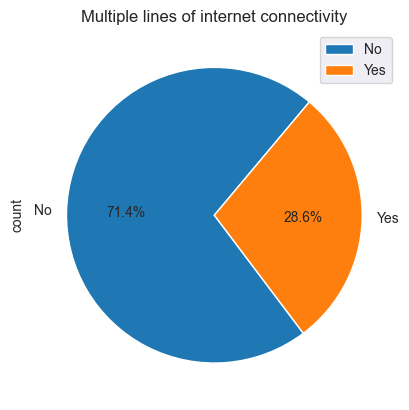

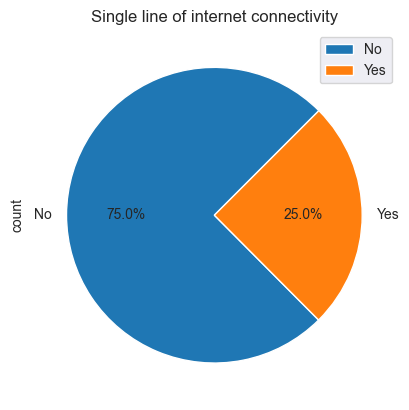

In [394]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

In [395]:
# Multiple lines of internet connectivity doesn't effect churn that much.

#### Internet Service

<Figure size 1500x500 with 0 Axes>

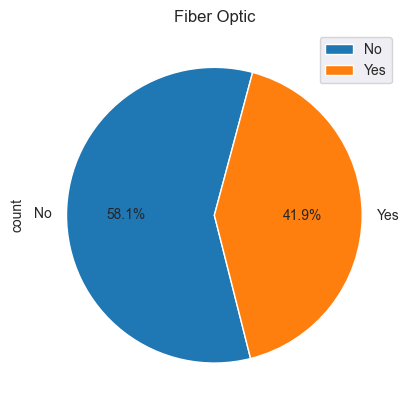

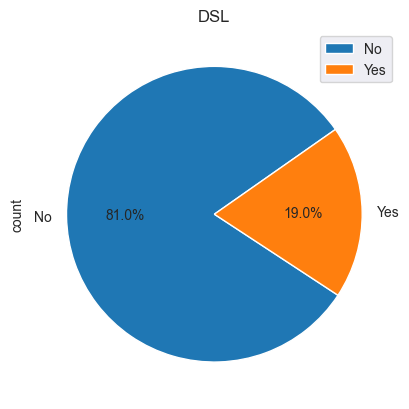

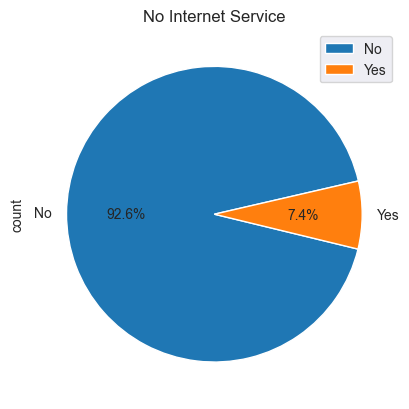

In [396]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(telecom[telecom['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(telecom[telecom['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(telecom[telecom['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

In [397]:
# Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#### Online Security

<Figure size 1500x500 with 0 Axes>

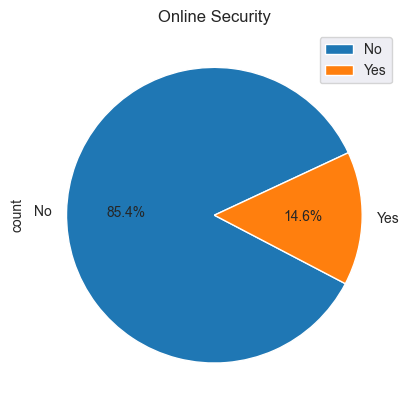

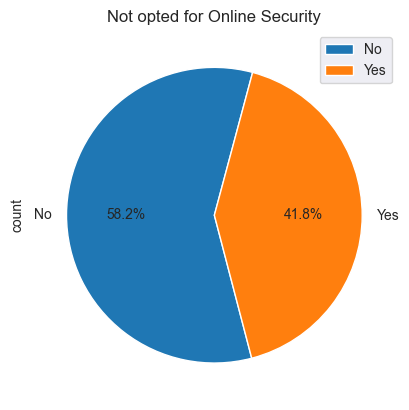

In [398]:
plt.figure(figsize=(15,5))
pie_OnlineSecurity_Y = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'Yes']['Churn'].value_counts())
pie_OnlineSecurity_Y.plot.pie(subplots = True,  labels = pie_OnlineSecurity_Y.index.values, autopct='%1.1f%%', startangle= 25)
plt.title('Online Security')
plt.gca().set_aspect('equal')

pie_OnlineSecurity_N = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'No']['Churn'].value_counts())
pie_OnlineSecurity_N.plot.pie(subplots = True, labels = pie_OnlineSecurity_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Security')
plt.gca().set_aspect('equal')
plt.show() 

In [399]:
# Customers opted for Online Security churn less than who have not opted.

#### Online Backup

<Figure size 1500x500 with 0 Axes>

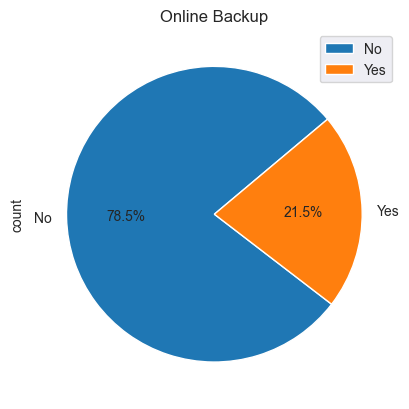

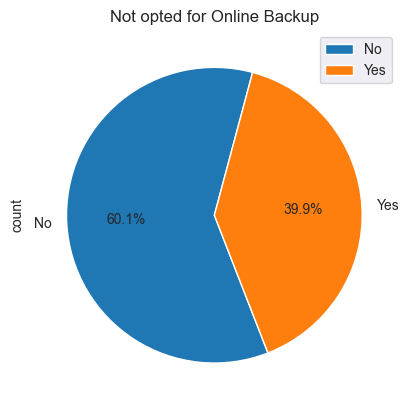

In [400]:
plt.figure(figsize=(15,5))
pie_OnlineBackup_Y = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'Yes']['Churn'].value_counts())
pie_OnlineBackup_Y.plot.pie(subplots = True,  labels = pie_OnlineBackup_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_OnlineBackup_N = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'No']['Churn'].value_counts())
pie_OnlineBackup_N.plot.pie(subplots = True, labels = pie_OnlineBackup_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')

plt.show() 

In [401]:
# Customers opted for Online Backup churn less than who have not opted.

#### Device Protection

<Figure size 1500x500 with 0 Axes>

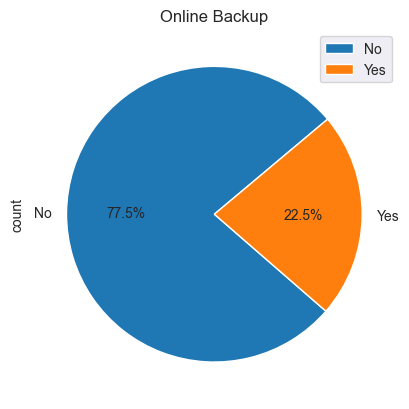

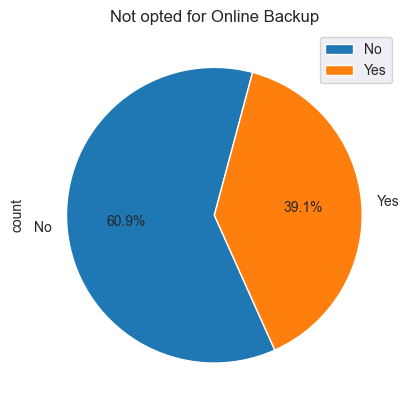

In [402]:
plt.figure(figsize=(15,5))

pie_DeviceProtection_Y = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'Yes']['Churn'].value_counts())
pie_DeviceProtection_Y.plot.pie(subplots = True, labels = pie_DeviceProtection_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_DeviceProtection_N = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'No']['Churn'].value_counts())
pie_DeviceProtection_N.plot.pie(subplots = True, labels = pie_DeviceProtection_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')
plt.show() 

In [403]:
# Customers opted for Device Potection churn less than who have not opted.

#### Tech Support

<Figure size 1500x500 with 0 Axes>

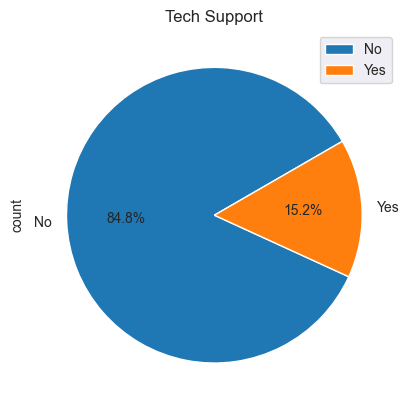

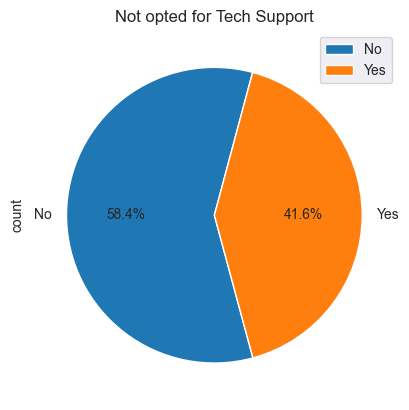

In [404]:
plt.figure(figsize=(15,5))
pie_TechSupport_Y = pd.DataFrame(telecom[telecom['TechSupport'] == 'Yes']['Churn'].value_counts())
pie_TechSupport_Y.plot.pie(subplots = True,labels = pie_TechSupport_Y.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Tech Support')
plt.gca().set_aspect('equal')

pie_TechSupport_N = pd.DataFrame(telecom[telecom['TechSupport'] == 'No']['Churn'].value_counts())
pie_TechSupport_N.plot.pie(subplots = True, labels = pie_TechSupport_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Tech Support')

plt.gca().set_aspect('equal')
plt.show() 

In [405]:
# Customers opted for Tech Support churn less than who have not opted.

#### Streaming TV

<Figure size 1500x500 with 0 Axes>

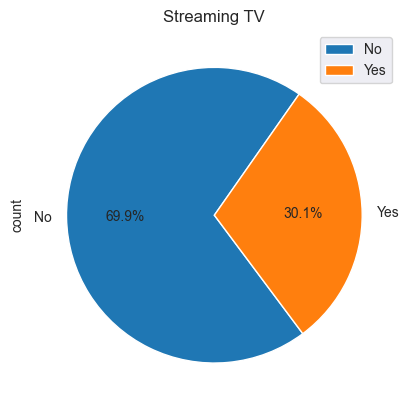

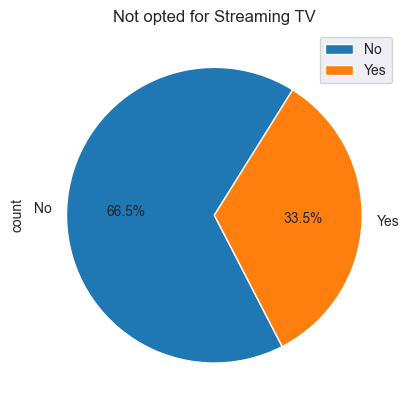

In [406]:
plt.figure(figsize=(15,5))
pie_StreamingTV_Y = pd.DataFrame(telecom[telecom['StreamingTV'] == 'Yes']['Churn'].value_counts())
pie_StreamingTV_Y.plot.pie(subplots = True, labels = pie_StreamingTV_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming TV')
plt.gca().set_aspect('equal')

pie_StreamingTV_N = pd.DataFrame(telecom[telecom['StreamingTV'] == 'No']['Churn'].value_counts())
pie_StreamingTV_N.plot.pie(subplots = True,labels = pie_StreamingTV_N.index.values, autopct='%1.1f%%', startangle= 58)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show() 

In [407]:
# Streaming TV doesn't make such impact on churning.

#### Streaming Movies

<Figure size 1500x500 with 0 Axes>

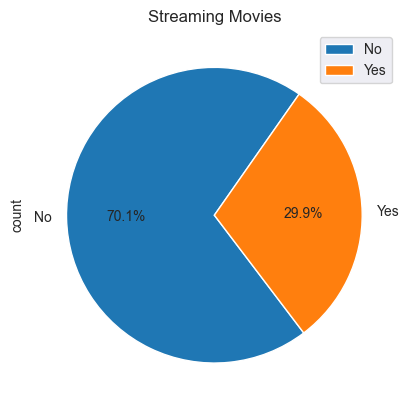

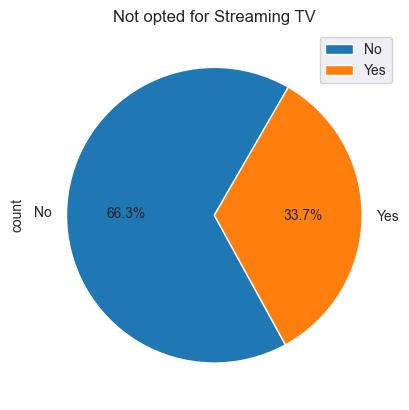

In [408]:
plt.figure(figsize=(15,5))
pie_StreamingMovies_Y = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'Yes']['Churn'].value_counts())
pie_StreamingMovies_Y.plot.pie(subplots = True, labels = pie_StreamingMovies_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming Movies')
plt.gca().set_aspect('equal')

pie_StreamingMovies_N = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'No']['Churn'].value_counts())
pie_StreamingMovies_N.plot.pie(subplots = True, labels = pie_StreamingMovies_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show()

In [409]:
# Streaming Movies doesn't make such impact on churning.

## Model Building

### Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [410]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# def binary_map_TF(x):
#     return x.map({'True': 1, "False": 0})
# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)
# telecom[varlist] = telecom[varlist].apply(binary_map_TF)


In [411]:
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.50,0,Male,...,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.90,0,Female,...,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,...,1,1,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,1,Month-to-month,1,Mailed check,74.40,306.60,1,Male,...,1,0,Yes,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [412]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [413]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [414]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [415]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


#### Dropping the repeated variables

In [416]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [417]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [418]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [419]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [420]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [421]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [422]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [423]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [424]:
from sklearn.model_selection import train_test_split

In [425]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [426]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [427]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [428]:
from sklearn.preprocessing import StandardScaler

In [429]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,True,True,False,True,False,False,True,False,True
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,False,True,False,True,True,False,True,False,True,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,False,True,False,True,False,True,False,True,False,True
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,True,False,False,True,False,True,False,True,False,True


In [430]:
print(X_train.dtypes)

tenure                                   float64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
MultipleLines_No                            bool
MultipleLines_Yes                           bool
OnlineSecurity_No                           bool
OnlineSecurity_Yes                          bool
OnlineBackup_No     

In [431]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

### Step 6: Looking at Correlations

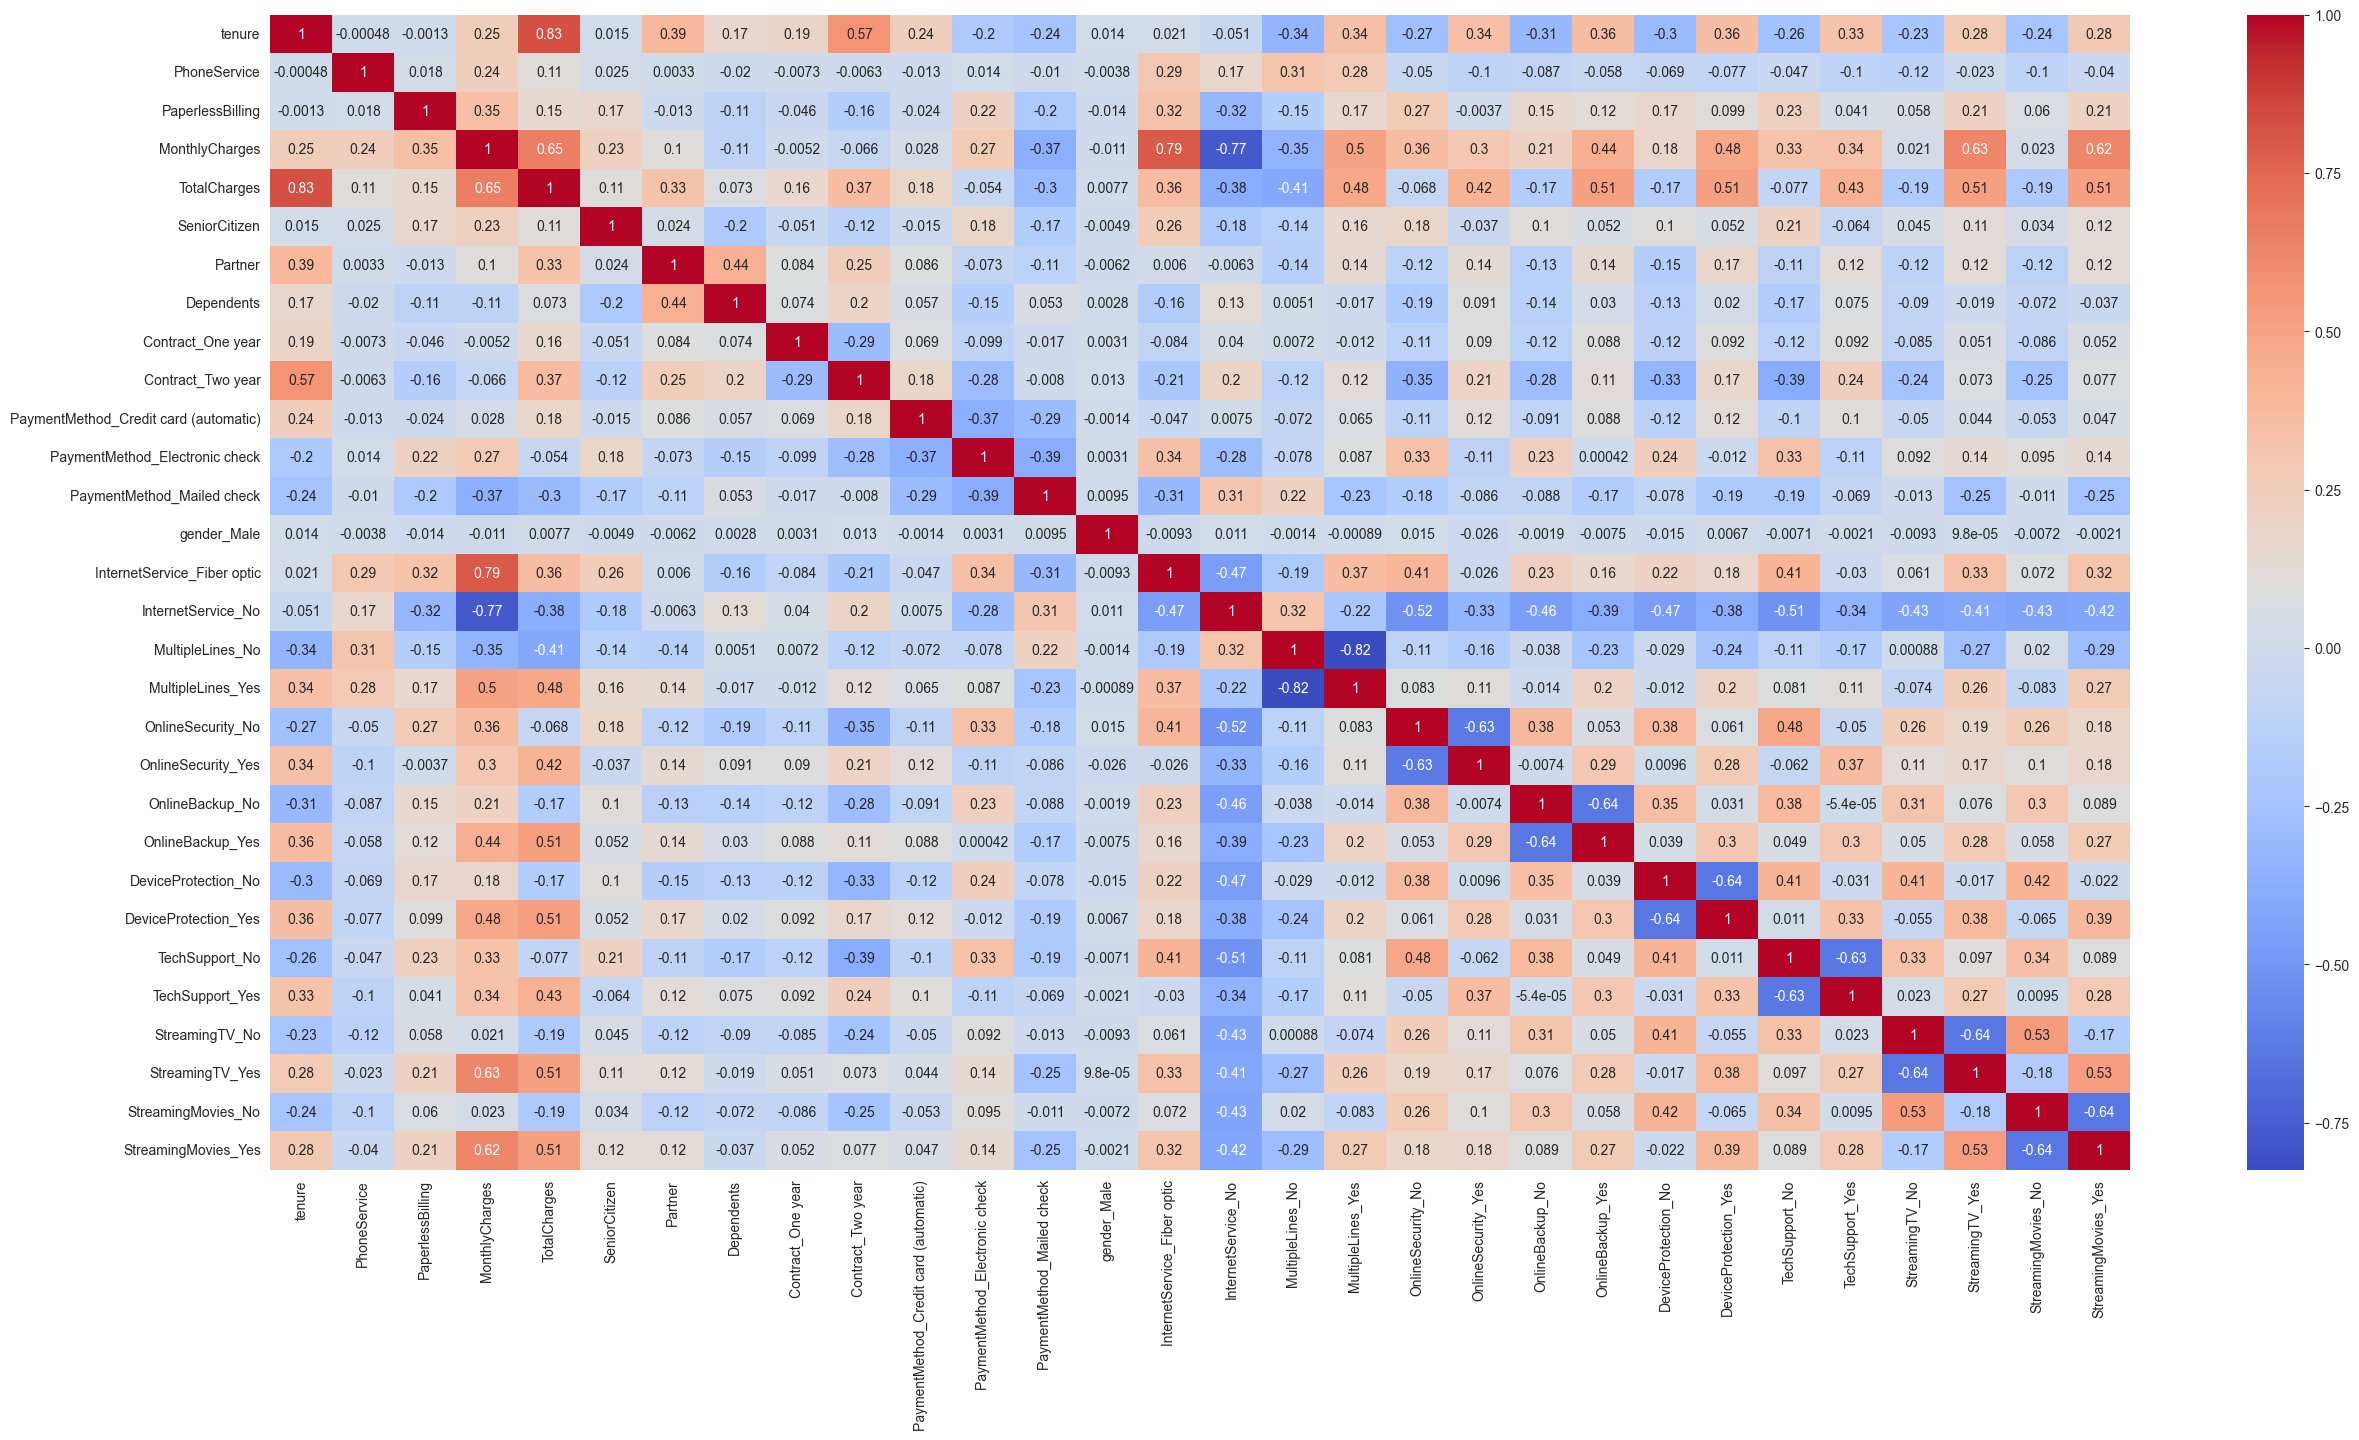

In [432]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
# sns.heatmap(telecom.corr(),annot = True)
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.show()

#### Dropping highly correlated dummy variables

In [433]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

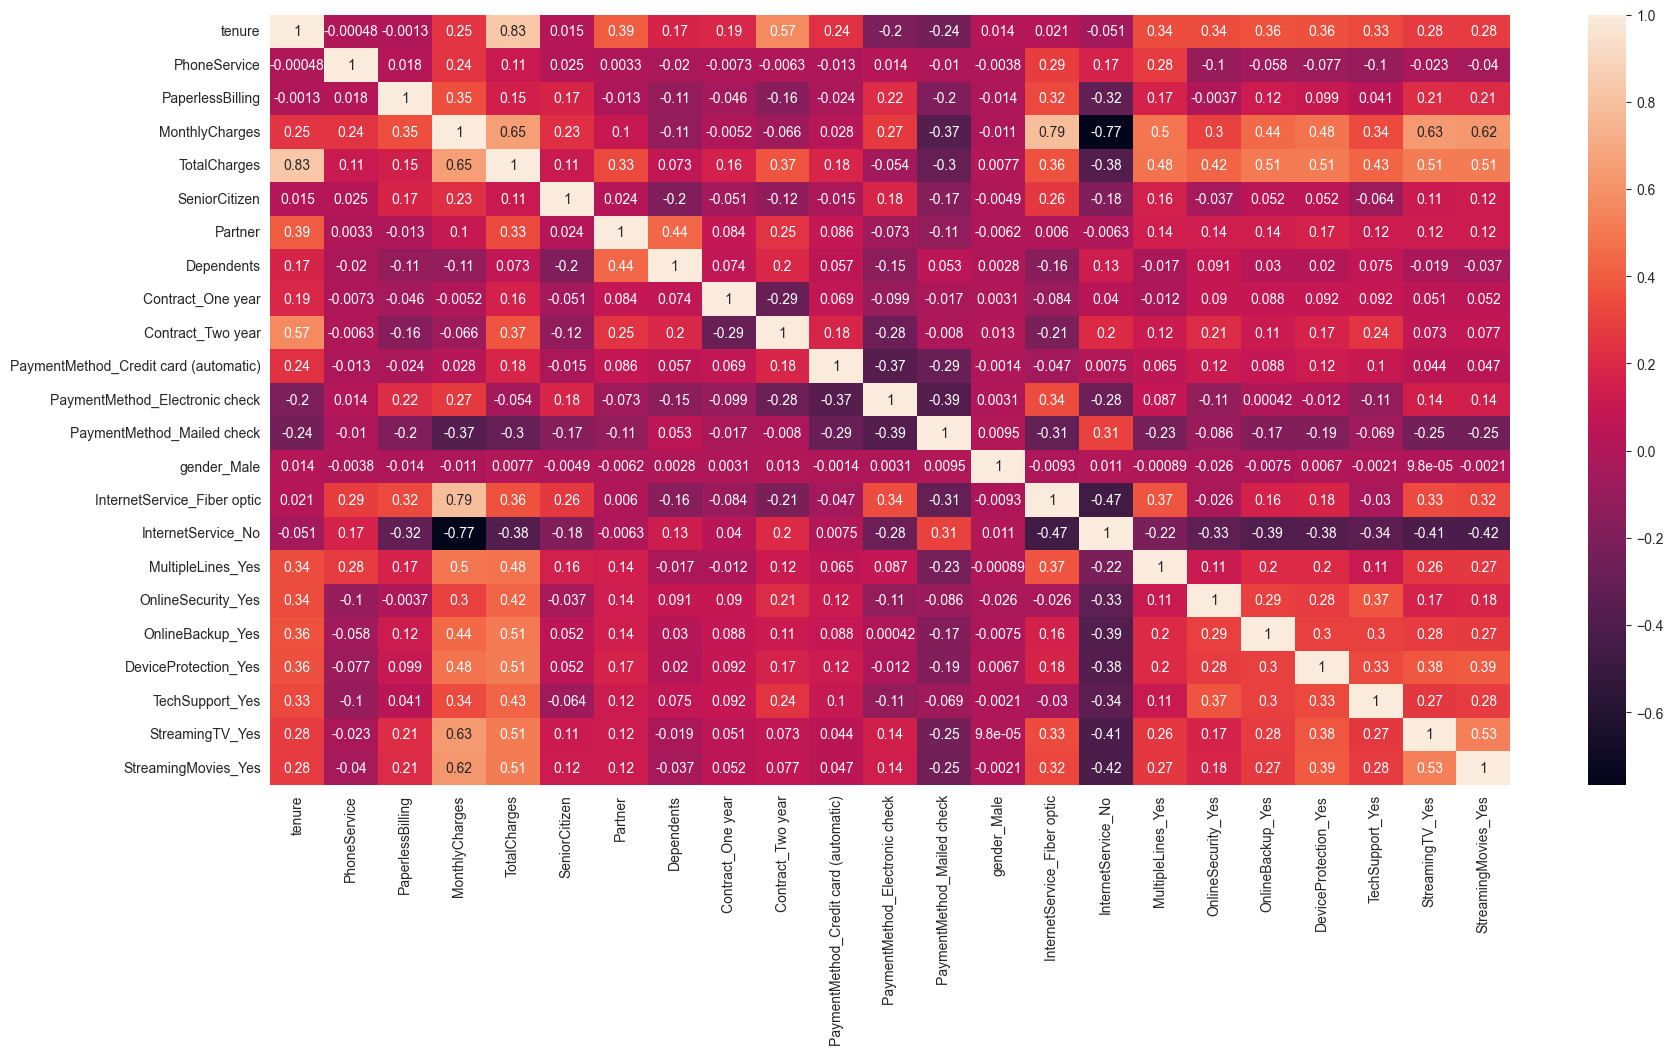

In [434]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [435]:
import statsmodels.api as sm

In [436]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,True,False,False,True,False,True,False,False,False,False
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,False,False,False,False,True,False,False,True,True
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,False,True,False,False,False,True,True,False,False,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,True,True,False,False,True,True,True,True,True,True
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,False,True,False,False,False,False,True,True,True,True


In [437]:
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
bool_cols = X_test.select_dtypes(include=['bool']).columns
X_test[bool_cols] = X_test[bool_cols].astype(int)
X_train_enc = pd.get_dummies(X_train, drop_first=True)

# force everything to numeric
X_train_enc = X_train_enc.apply(pd.to_numeric, errors='coerce')
# y_train.head()

In [438]:
for col in X_train.columns:
    print(f"\nColumn: {col}")
    print(f"Count: {X_train[col].value_counts()}, Unique: {X_train[col].unique()}")


Column: tenure
Count: tenure
-1.286319    413
 1.611396    258
-1.245506    169
-1.204693    135
-1.163880    119
            ... 
 0.468635     36
 0.142132     36
 0.427822     36
 0.264571     35
 0.223758     32
Name: count, Length: 72, dtype: int64, Unique: [ 0.01969334  0.30538352 -1.28631894 -0.91900299 -1.16388029 -0.95981587
 -0.06193243 -0.59249992 -1.24550605  0.71351236  1.40733138  0.3461964
  0.38700929  0.95838966  0.75432524  0.50944794  1.61139579  1.57058291
  0.46863505  0.06050622 -0.34762262 -0.8781901  -0.02111955 -0.79656433
 -1.00062875 -0.22518397  1.28489272 -0.30680973  0.1013191   0.79513812
 -1.08225452  0.99920254  1.12164119  0.14213199 -0.6333128  -0.18437108
  0.63188659  1.48895714  1.04001542 -1.1230674   1.52977003  1.24407984
 -0.42924838  1.16245407  0.55026082  0.22375775 -0.1435582   0.42782217
 -0.83737722  1.32570561 -1.20469317  0.67269947  0.87676389 -0.75575145
  1.44814426 -0.51087415 -0.71493857 -0.26599685  0.91757677 -0.67412568
  1.080

In [439]:
# Logistic regression model
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_train_enc = sm.add_constant(X_train_enc)
X_train_enc.head()
#
logm1 = sm.GLM(y_train.values,X_train_enc.values, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 09 Sep 2025   Deviance:                       4009.4
Time:                        15:59:38   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9382      1.546     -2.547      0.011      -6.969      -0.908
x1            -1.5172      0.189     -8.015      0.000      -1.888      -1.146
x2             0.9507      0.789      1.205      0.228      -0.595       2.497
x3             0.3254      0.090      3.614      0.000       0.149       0.502
x4            -2.1806      1.160     -1.880      0.060      -4.454       0.092
x5             0.7332      0.198      3.705      0.000       0.345       1.121
x6             0.3984      0.102      3.924      0.000       0.199       0.597
x7             0.0374      0.094      0.399      0.690      -0.146       0.221
x8            -0.1430      0.107     -1.332      0.183      -0.353       0.067
x9            -0.6578      0.129     -5.106      0.000      -0.910      -0.405
x10           -1.2455      0.212     -5.874      0.000      -1.661      -0.830
x11           -0.2577      0.137     -1.883      0.060      -0.526       0.011
x12            0.1615      0.113      1.434      0.152      -0.059       0.382
x13           -0.2536      0.137     -1.845      0.065      -0.523       0.016
x14           -0.0346      0.078     -0.442      0.658      -0.188       0.119
x15            2.5124      0.967      2.599      0.009       0.618       4.407
x16           -2.7792      0.982     -2.831      0.005      -4.703      -0.855
x17            0.5623      0.214      2.628      0.009       0.143       0.982
x18           -0.0245      0.216     -0.113      0.910      -0.448       0.399
x19            0.1740      0.212      0.822      0.411      -0.241       0.589
x20            0.3229      0.215      1.501      0.133      -0.099       0.744
x21           -0.0305      0.216     -0.141      0.888      -0.455       0.394
x22            0.9598      0.396      2.423      0.015       0.183       1.736
x23            0.8484      0.396      2.143      0.032       0.072       1.624
==============================================================================
"""

### Step 8: Feature Selection Using RFE

In [440]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [441]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
# rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [442]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [443]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', np.True_, np.int64(1)),
 ('PhoneService', np.False_, np.int64(7)),
 ('PaperlessBilling', np.False_, np.int64(4)),
 ('MonthlyCharges', np.True_, np.int64(1)),
 ('TotalCharges', np.True_, np.int64(1)),
 ('SeniorCitizen', np.True_, np.int64(1)),
 ('Partner', np.False_, np.int64(11)),
 ('Dependents', np.False_, np.int64(10)),
 ('Contract_One year', np.True_, np.int64(1)),
 ('Contract_Two year', np.True_, np.int64(1)),
 ('PaymentMethod_Credit card (automatic)', np.False_, np.int64(3)),
 ('PaymentMethod_Electronic check', np.False_, np.int64(8)),
 ('PaymentMethod_Mailed check', np.False_, np.int64(2)),
 ('gender_Male', np.False_, np.int64(12)),
 ('InternetService_Fiber optic', np.True_, np.int64(1)),
 ('InternetService_No', np.True_, np.int64(1)),
 ('MultipleLines_Yes', np.True_, np.int64(1)),
 ('OnlineSecurity_Yes', np.False_, np.int64(6)),
 ('OnlineBackup_Yes', np.False_, np.int64(9)),
 ('DeviceProtection_Yes', np.False_, np.int64(13)),
 ('TechSupport_Yes', np.False_, np.int64(

In [444]:
col = X_train.columns[rfe.support_]
print(col)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')


In [445]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [446]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.3
Date:                Tue, 09 Sep 2025   Deviance:                       4062.5
Time:                        15:59:38   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2766
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4327      0.158    -15.402      0.000      -2.742      -2.123
tenure                         -1.4711      0.184     -8.010      0.000      -1.831      -1.111
MonthlyCharges                 -1.1549      0.184     -6.279      0.000      -1.515      -0.794
TotalCharges                    0.6548      0.195      3.359      0.001       0.273       1.037
SeniorCitizen                   0.4891      0.099      4.956      0.000       0.296       0.683
Contract_One year              -0.7616      0.127     -6.018      0.000      -1.010      -0.514
Contract_Two year              -1.4601      0.207     -7.044      0.000      -1.866      -1.054
InternetService_Fiber optic     1.9337      0.196      9.859      0.000       1.549       2.318
InternetService_No             -1.9165      0.211     -9.089      0.000      -2.330      -1.503
MultipleLines_Yes               0.4522      0.102      4.451      0.000       0.253       0.651
StreamingTV_Yes                 0.6792      0.111      6.119      0.000       0.462       0.897
StreamingMovies_Yes             0.5596      0.109      5.140      0.000       0.346       0.773
===============================================================================================
"""

In [447]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.141849
5790    0.234950
6498    0.520938
880     0.498011
2784    0.651654
3874    0.319438
5387    0.492438
6623    0.776976
4465    0.179572
5364    0.547303
dtype: float64

In [448]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14184908, 0.23495033, 0.52093813, 0.49801078, 0.65165382,
       0.31943794, 0.49243768, 0.77697601, 0.17957212, 0.54730313])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [449]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.141849,879
1,0,0.234950,5790
2,1,0.520938,6498
3,1,0.498011,880
4,1,0.651654,2784


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [450]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.141849,879,0
1,0,0.234950,5790,0
2,1,0.520938,6498,1
3,1,0.498011,880,0
4,1,0.651654,2784,1


In [451]:
from sklearn import metrics

In [452]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3257  378]
 [ 593  694]]


In [453]:
# Predicted     not_churn    churn
# Actual
# not_churn        3257      378
# churn                   694

In [454]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8027224705404307


#### Checking VIFs

In [455]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [456]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,MonthlyCharges,12.77
2,TotalCharges,10.09
0,tenure,6.77
7,InternetService_No,4.88
6,InternetService_Fiber optic,4.42
5,Contract_Two year,2.63
9,StreamingTV_Yes,2.61
10,StreamingMovies_Yes,2.61
8,MultipleLines_Yes,2.25
4,Contract_One year,1.66


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [457]:
# col = col.drop(['MonthlyCharges','PhoneService'], 1)
col = col.drop(['MonthlyCharges'], 1)
col

Index(['tenure', 'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [458]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Tue, 09 Sep 2025   Deviance:                       4102.7
Time:                        15:59:39   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2707
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7295      0.105    -16.454      0.000      -1.935      -1.523
tenure                         -1.1578      0.175     -6.622      0.000      -1.501      -0.815
TotalCharges                    0.2282      0.181      1.257      0.209      -0.127       0.584
SeniorCitizen                   0.5399      0.098      5.500      0.000       0.347       0.732
Contract_One year              -0.8448      0.125     -6.741      0.000      -1.090      -0.599
Contract_Two year              -1.5718      0.206     -7.628      0.000      -1.976      -1.168
InternetService_Fiber optic     0.9129      0.104      8.803      0.000       0.710       1.116
InternetService_No             -0.9741      0.150     -6.504      0.000      -1.268      -0.681
MultipleLines_Yes               0.2098      0.093      2.265      0.024       0.028       0.391
StreamingTV_Yes                 0.3257      0.095      3.430      0.001       0.140       0.512
StreamingMovies_Yes             0.2276      0.094      2.409      0.016       0.042       0.413
===============================================================================================
"""

In [459]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [460]:
y_train_pred[:10]

array([0.16720396, 0.17428949, 0.61073896, 0.66263764, 0.70960979,
       0.30832111, 0.35420237, 0.76843759, 0.11643261, 0.55894329])

In [461]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [462]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.167204,879,0
1,0,0.174289,5790,0
2,1,0.610739,6498,1
3,1,0.662638,880,1
4,1,0.709610,2784,1


In [463]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8015034538805363


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [464]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalCharges,7.08
0,tenure,6.45
5,InternetService_Fiber optic,2.59
9,StreamingMovies_Yes,2.51
8,StreamingTV_Yes,2.50
4,Contract_Two year,2.47
7,MultipleLines_Yes,2.20
6,InternetService_No,2.14
3,Contract_One year,1.54
2,SeniorCitizen,1.29


In [465]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [468]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.1
Date:                Tue, 09 Sep 2025   Deviance:                       4104.3
Time:                        16:00:23   Pearson chi2:                 5.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2705
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7529      0.103    -17.022      0.000      -1.955      -1.551
tenure                         -0.9548      0.064    -14.950      0.000      -1.080      -0.830
SeniorCitizen                   0.5394      0.098      5.484      0.000       0.347       0.732
Contract_One year              -0.8386      0.125     -6.714      0.000      -1.083      -0.594
Contract_Two year              -1.5480      0.204     -7.572      0.000      -1.949      -1.147
InternetService_Fiber optic     0.9680      0.094     10.297      0.000       0.784       1.152
InternetService_No             -0.9813      0.149     -6.574      0.000      -1.274      -0.689
MultipleLines_Yes               0.2295      0.091      2.516      0.012       0.051       0.408
StreamingTV_Yes                 0.3527      0.093      3.812      0.000       0.171       0.534
StreamingMovies_Yes             0.2532      0.092      2.744      0.006       0.072       0.434
===============================================================================================
"""

In [469]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [470]:
y_train_pred[:10]

array([0.17622463, 0.19175912, 0.60902876, 0.66782264, 0.71751273,
       0.3022804 , 0.3448791 , 0.77067759, 0.12713847, 0.56549694])

In [471]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [472]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.176225,879,0
1,0,0.191759,5790,0
2,1,0.609029,6498,1
3,1,0.667823,880,1
4,1,0.717513,2784,1


In [473]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8000812677773262


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [474]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,StreamingMovies_Yes,2.45
7,StreamingTV_Yes,2.43
4,InternetService_Fiber optic,2.41
3,Contract_Two year,2.40
6,MultipleLines_Yes,2.18
0,tenure,1.72
5,InternetService_No,1.67
2,Contract_One year,1.53
1,SeniorCitizen,1.28


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [475]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3271,  364],
       [ 620,  667]])

In [476]:
# Actual/Predicted     not_churn    churn
        # not_churn        3271      364
        # churn            620       667

In [477]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8000812677773262

## Metrics beyond simply accuracy

In [478]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [479]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.5182595182595182)

In [480]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.8998624484181568)

In [481]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10013755158184319


In [482]:
# positive predictive value 
print (TP / float(TP+FP))

0.646944713870029


In [483]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8406579285530712


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [484]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [485]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

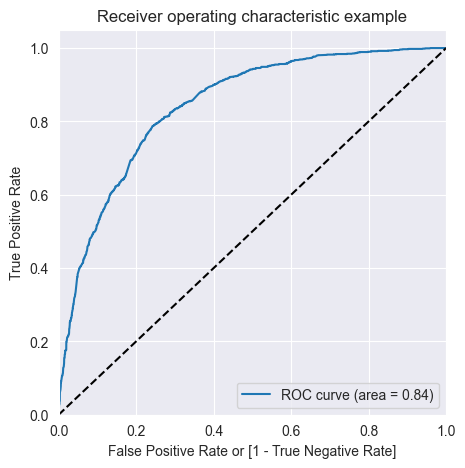

In [486]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [487]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.176225,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.191759,5790,0,1,1,0,0,0,0,0,0,0,0
2,1,0.609029,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.667823,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.717513,2784,1,1,1,1,1,1,1,1,1,0,0
5,0,0.302280,3874,0,1,1,1,1,0,0,0,0,0,0
6,0,0.344879,5387,0,1,1,1,1,0,0,0,0,0,0
7,1,0.770678,6623,1,1,1,1,1,1,1,1,1,0,0
8,0,0.127138,4465,0,1,1,0,0,0,0,0,0,0,0
9,1,0.565497,5364,1,1,1,1,1,1,1,0,0,0,0


In [488]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.608899  0.945610  0.489684
0.2   0.2  0.718813  0.850039  0.672352
0.3   0.3  0.764323  0.787879  0.755983
0.4   0.4  0.788094  0.628594  0.844567
0.5   0.5  0.800081  0.518260  0.899862
0.6   0.6  0.802519  0.383061  0.951032
0.7   0.7  0.771638  0.174825  0.982944
0.8   0.8  0.744819  0.028749  0.998349
0.9   0.9  0.738521  0.000000  1.000000


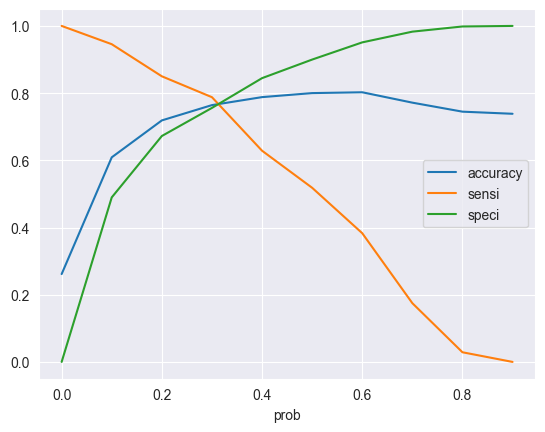

In [489]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [490]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.176225,879,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.191759,5790,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.609029,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.667823,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.717513,2784,1,1,1,1,1,1,1,1,1,0,0,1
5,0,0.302280,3874,0,1,1,1,1,0,0,0,0,0,0,1
6,0,0.344879,5387,0,1,1,1,1,0,0,0,0,0,0,1
7,1,0.770678,6623,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.127138,4465,0,1,1,0,0,0,0,0,0,0,0,0
9,1,0.565497,5364,1,1,1,1,1,1,1,0,0,0,0,1


In [491]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7643234457537587

In [492]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2748,  887],
       [ 273, 1014]])

In [493]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [494]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.7878787878787878)

In [495]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.7559834938101788)

In [496]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.24401650618982118


In [497]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5334034718569174


In [498]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9096325719960278


## Precision and Recall

In [499]:
#Looking at the confusion matrix again

In [500]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3271,  364],
       [ 620,  667]])

##### Precision
TP / TP + FP

In [501]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

np.float64(0.646944713870029)

##### Recall
TP / TP + FN

In [502]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

np.float64(0.5182595182595182)

Using sklearn utilities for the same

In [503]:
from sklearn.metrics import precision_score, recall_score

In [504]:
?precision_score

In [505]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.646944713870029

In [506]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5182595182595182

### Precision and recall tradeoff

In [507]:
from sklearn.metrics import precision_recall_curve

In [508]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [509]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

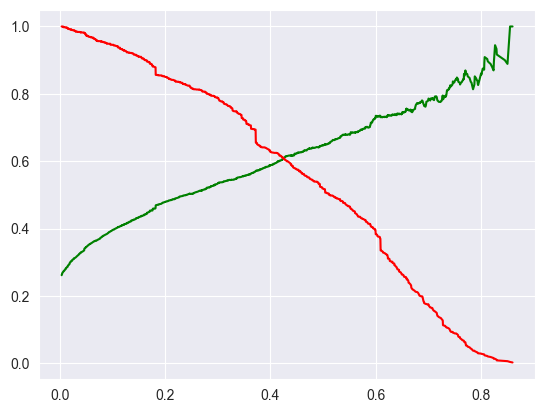

In [510]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [511]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [512]:
X_test = X_test[col]
X_test.head()

,tenure,SeniorCitizen,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,0,0,0,1,0,0,0,1
3730,0.999203,0,0,0,1,0,1,1,1
1761,1.040015,0,0,1,0,1,1,0,0
2283,-1.286319,0,0,0,1,0,0,0,0
1872,0.346196,0,0,1,0,1,0,0,0


In [513]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [514]:
y_test_pred = res.predict(X_test_sm)

In [515]:
y_test_pred[:10]

942     0.450206
3730    0.288317
1761    0.006397
2283    0.609029
1872    0.009828
1970    0.636934
2532    0.308136
1616    0.006180
2485    0.541453
5914    0.188477
dtype: float64

In [516]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [517]:
# Let's see the head
y_pred_1.head()

,0
942,0.450206
3730,0.288317
1761,0.006397
2283,0.609029
1872,0.009828


In [518]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [519]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [520]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [521]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [522]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.450206
1,1,3730,0.288317
2,0,1761,0.006397
3,1,2283,0.609029
4,0,1872,0.009828


In [523]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [524]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [525]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.450206
1,3730,1,0.288317
2,1761,0,0.006397
3,2283,1,0.609029
4,1872,0,0.009828


In [526]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [527]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.450206,1
1,3730,1,0.288317,0
2,1761,0,0.006397,0
3,2283,1,0.609029,1
4,1872,0,0.009828,0


In [528]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7758293838862559

In [529]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1292,  236],
       [ 237,  345]])

In [530]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [531]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.5927835051546392)

In [533]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.8455497382198953)